#CONSUMER BUYING BEHAVIOUR ANALYSIS
TEAM MEMBERS:

ANJALI SHARMA - 21070149002

ARADHANA PRATAP - 21070149003

KISHAN VYAS - 21070149028

#Problem Statement

Customer buying behaviour Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

This analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



## IMPORTING LIBRARIES

In [ ]:
import numpy as np                               
import pandas as pd                               
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##Let's first start with exploring the features in the dataset. Based on the data description, the features can be grouped into infomation about customers, information about the products, promotions, and the place where the purchases were made through.

Attributes

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 year

Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

NumWebPurchases: Number of purchases made through the company’s web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s web site in the last month

Target

Need to perform clustering & Apriori to summarize customer segments.

#IMPORTING DATASET

In [ ]:
# Import the Dataset
df = pd.read_excel('marketing_campaign.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()
# observation -> here, total 2240 samples and 29 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#Let's look at the summary statistics of the data. We can see that the maximum income is much higher than the income at the 3rd quatile (almost 10 times greater). Also, the maximum amount spent on wines and meat products (i.e. MntWines, MntMeatProduct) are significantly greater than the one spent on other products.

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2216.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000
mean,5592.160,1968.806,52247.251,0.444,0.506,49.109,303.936,26.302,166.950,37.525,27.063,44.022,2.325,4.085,2.662,5.790,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.000,11.000,0.149
std,3246.662,11.984,25173.077,0.538,0.545,28.962,336.597,39.773,225.715,54.629,41.280,52.167,1.932,2.779,2.923,3.251,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.000,0.000,0.356
min,0.000,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
25%,2828.250,1959.000,35303.000,0.000,0.000,24.000,23.750,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
50%,5458.500,1970.000,51381.500,0.000,0.000,49.000,173.500,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
75%,8427.750,1977.000,68522.000,1.000,1.000,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
max,11191.000,1996.000,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,11.000,1.000


#INSPECTING DATAFRAME

In [ ]:
df.shape

(2240, 29)

#Checking null values

### observation -> data['Income'] have 24 null values

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#DATA CLEANING
## we can see that two columns 'Z_CostContact' and 'Z_Revenue' which haven't been described by the data.

### Dropping columns because they will not contribute anything in model building

In [ ]:
df = df.drop(['Z_CostContact', 'Z_Revenue'],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

# Checking correlation between the attributes

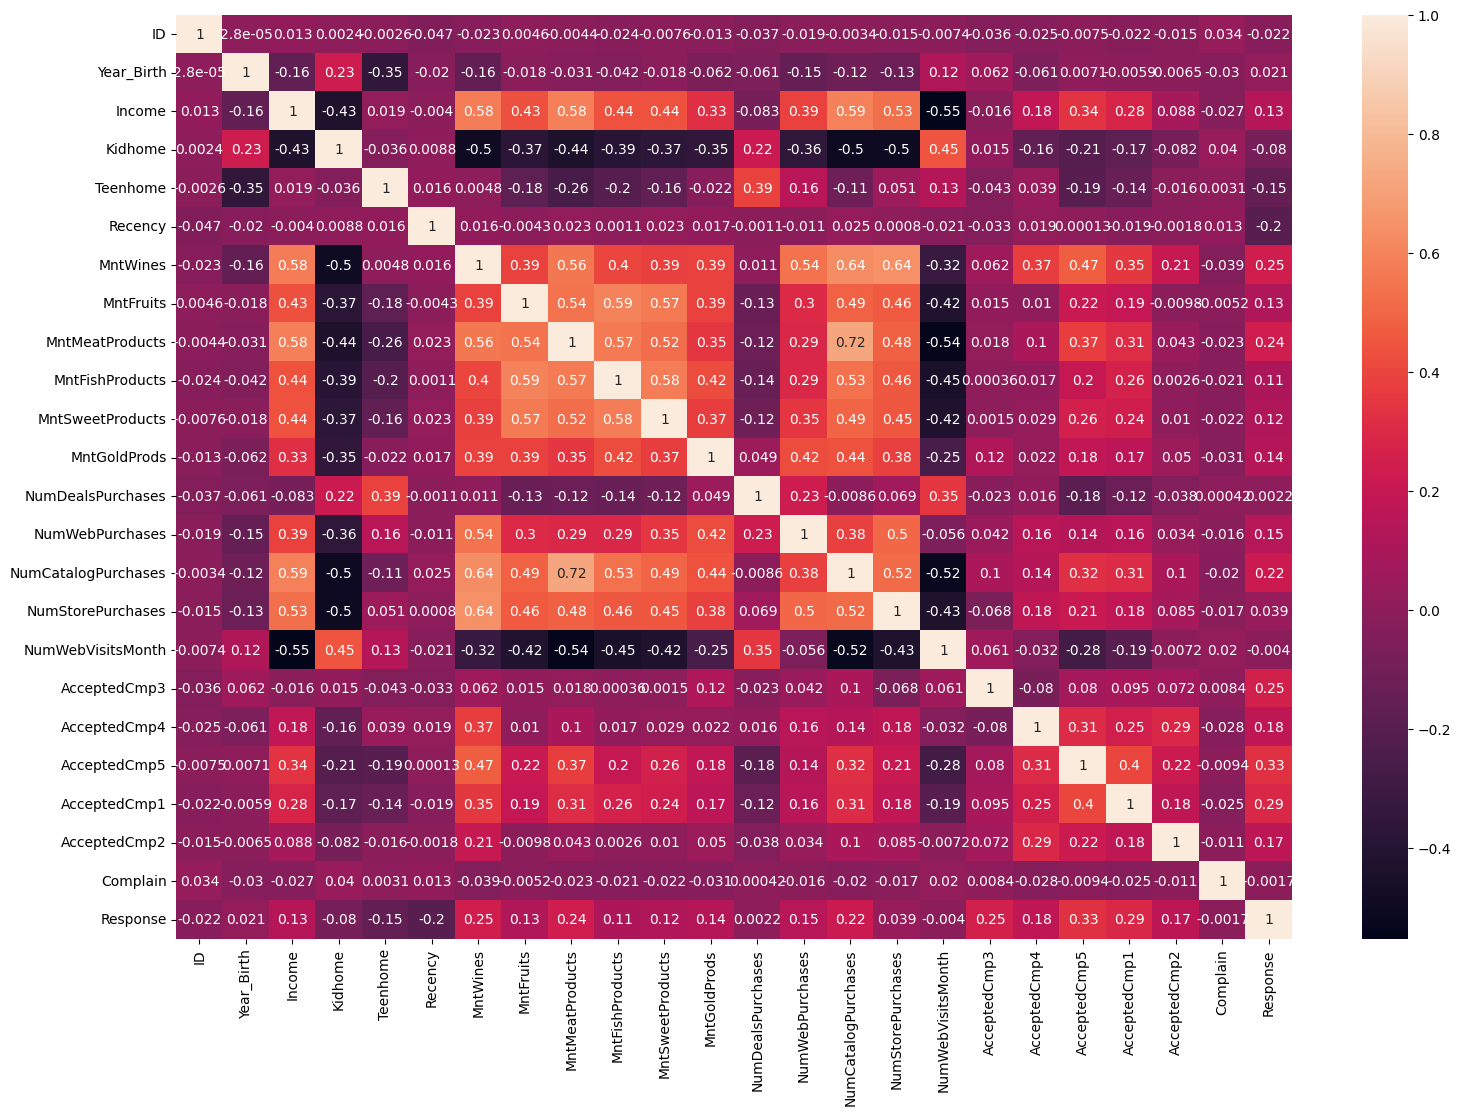

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

####No two columns are too much correlated with each other so we can't drop any column on the basis of correlation.

### Checking for correlation by unstacking data

##It is used to calculate how one variable is correlated/ dependent on other variable.
Extreme values signify high correlation.
Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

In [ ]:
# Check the Correlation Report
corr_data = df.corr()
corr_data.abs().unstack().sort_values(ascending=False)[24:50:2]

MntMeatProducts      NumCatalogPurchases   0.724
NumStorePurchases    MntWines              0.642
MntWines             NumCatalogPurchases   0.635
MntFishProducts      MntFruits             0.595
NumCatalogPurchases  Income                0.589
MntMeatProducts      Income                0.585
MntSweetProducts     MntFishProducts       0.580
Income               MntWines              0.579
MntFishProducts      MntMeatProducts       0.568
MntSweetProducts     MntFruits             0.567
MntWines             MntMeatProducts       0.563
Income               NumWebVisitsMonth     0.553
MntFruits            MntMeatProducts       0.543
dtype: float64

#PREPROCESSING OF THE DATASET

### Filling the missing value in the income my mean

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


# Checking number of unique categories present in the "Marital_Status"

In [ ]:
df['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

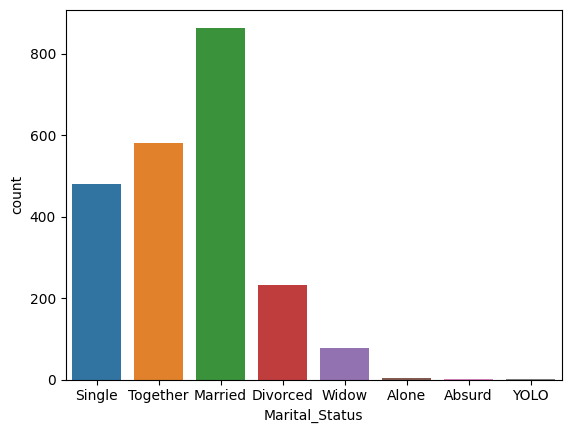

In [ ]:
sns.countplot(df.Marital_Status)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

##In the above cell we are grouping 'Married', 'Together' as "relationship"
##Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

## Count of different values present in Marital_Status

In [ ]:
df['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

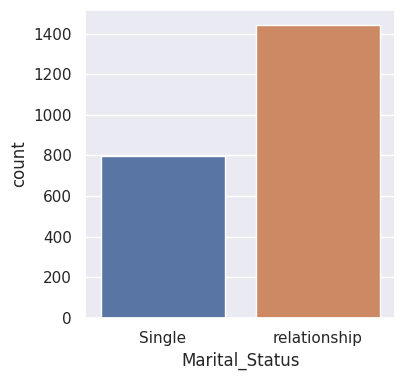

In [ ]:
sns.countplot(df.Marital_Status)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

#Separating Products to different Dataframe for Association Rule Mining

In [ ]:
product_data = []
for i in range(0, len(df)):
  productdata = [df['MntWines'][i], df['MntFruits'][i], 
                  df['MntMeatProducts'][i], df['MntFishProducts'][i], 
                  df['MntSweetProducts'][i], df['MntGoldProds'][i]]
  product_data.append(productdata)
Products_DF = pd.DataFrame(product_data, columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])
Products_DF.head()

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


##Combining different dataframe into a single column to reduce the number of dimension

In [ ]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

##Deleting some column to reduce dimension and complexity of model

In [ ]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.000,2012-09-04,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.000,2014-03-08,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.000,2013-08-21,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.000,2014-02-10,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.000,2014-01-19,94,0,1,422,0,19


### Adding a column "Age" in the dataframe

In [ ]:
df['Age'] = 2015 - df["Year_Birth"]

#Count of different values present in Education

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

# Changing category into UG and PG only

In [ ]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

## Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [ ]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,PG,Single,58138.000,0,1617,1,25,58,849
1,PG,Single,46344.000,2,27,0,6,61,299
2,PG,relationship,71613.000,0,776,0,21,50,498
3,PG,relationship,26646.000,1,53,0,8,31,325
4,PG,relationship,58293.000,1,422,0,19,34,347


#**VISUALIZATION**

#Then, let's look at the categorical distributions of education level and the marital status of the customers. We can see that majority of the customers have a graduation degree, and most of them are in relationship or married

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

#ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND EXPENSES WITH RESPECT TO EDUCATION

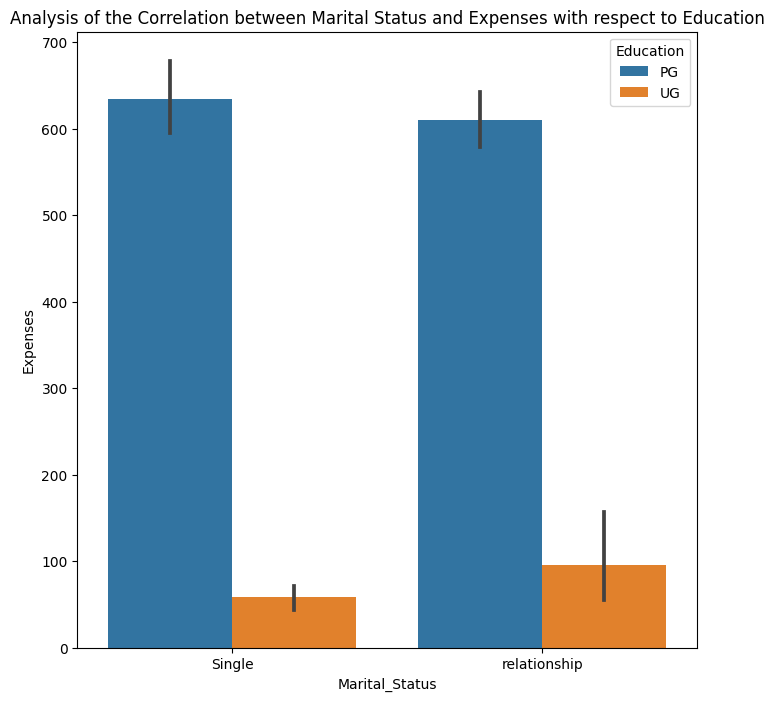

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'], hue = df["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

##Observation: Less number of single customers and very high expenses for single customers.

#ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND EXPENSES

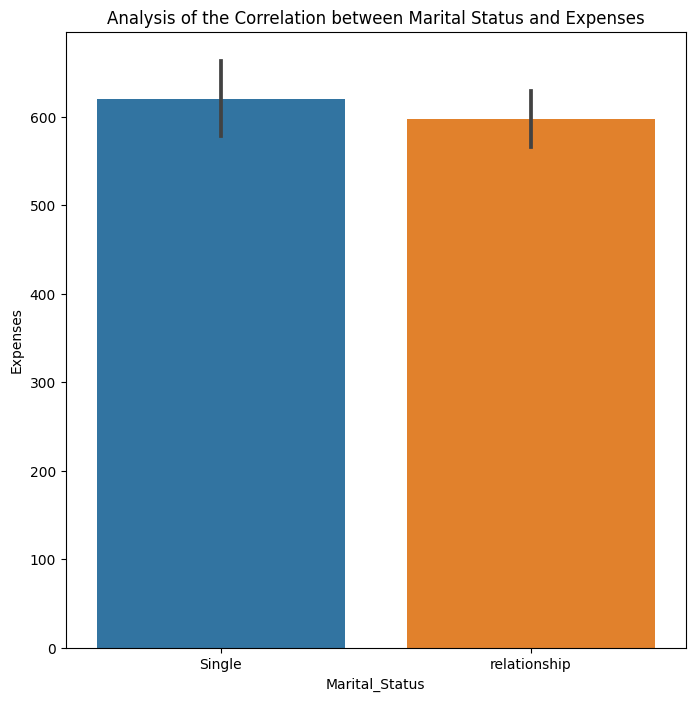

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Marital_Status'], y=df['Expenses'])
plt.title("Analysis of the Correlation between Marital Status and Expenses")
plt.show()

#DISTRIBUTION OF EXPENSES WITH RESPECT TO MARITAL STATUS

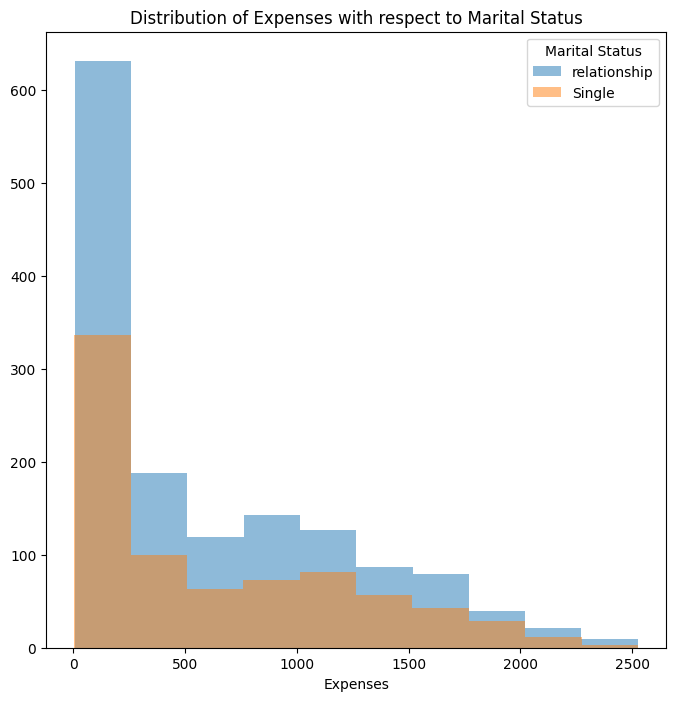

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Expenses", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Expenses with respect to Marital Status")
plt.xlabel("Expenses")
plt.legend(title = "Marital Status")
plt.show()

#DISTRIBUTION OF EXPENSES WITH RESPECT TO EDUCATION

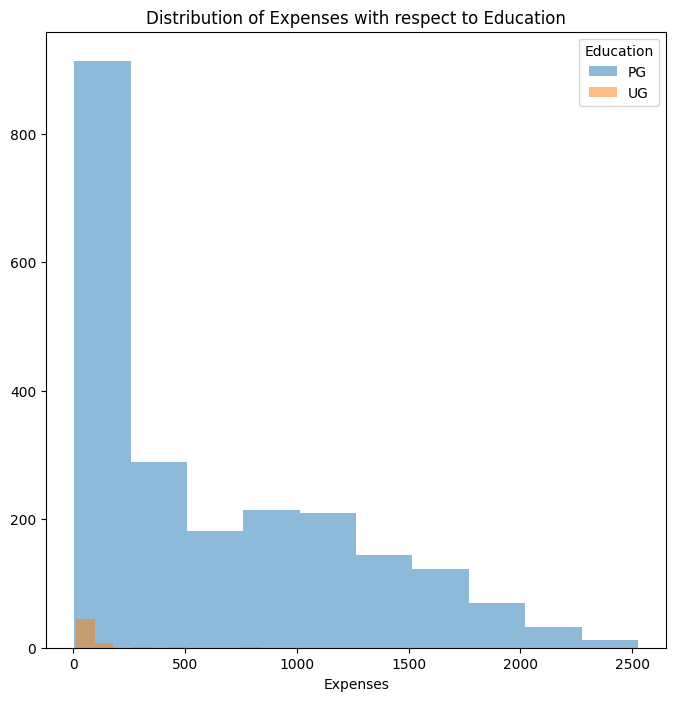

In [ ]:
#from numpy.core.fromnumeric import size
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("Expenses", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Expenses with respect to Education")
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show()

#DISTRIBUTION OF NUMBER OF TOTAL EXPENSES WITH RESPECT TO EDUCATION

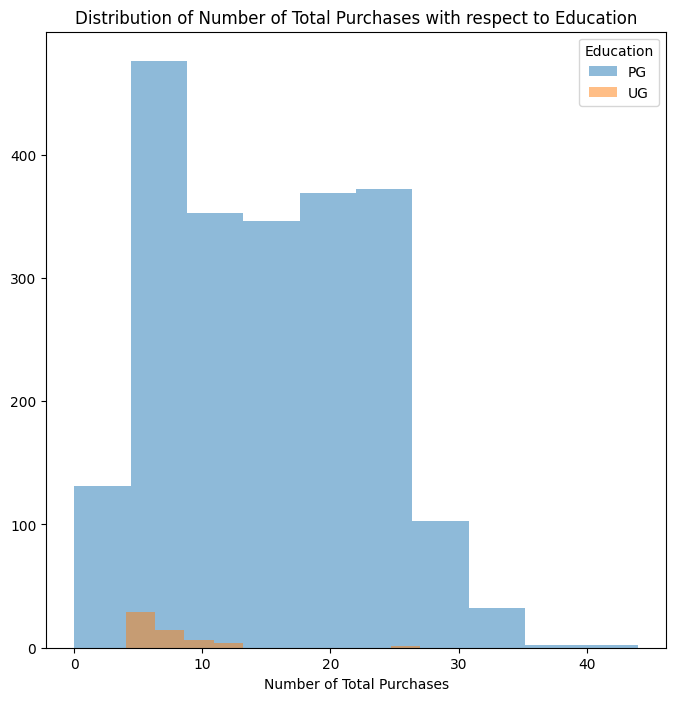

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("NumTotalPurchases", data = df[df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("NumTotalPurchases", data = df[df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Number of Total Purchases with respect to Education")
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Education")
plt.show()

#DISTRIBUTION OF AGE WITH RESPECT TO MARITAL STATUS

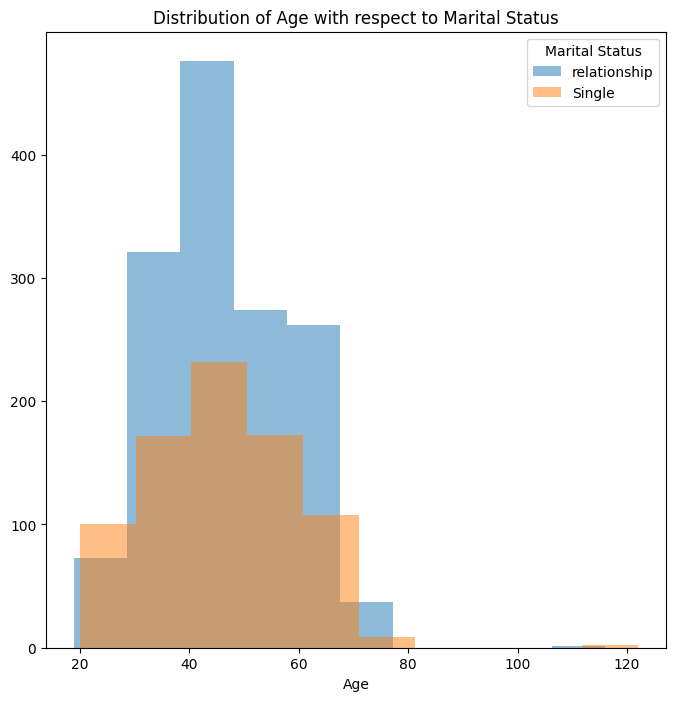

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("Age", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Age", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Age with respect to Marital Status")
plt.xlabel("Age")
plt.legend(title = "Marital Status")
plt.show()

#DISTRIBUTION OF INCOME WITH RESPECT TO MARITAL STATUS

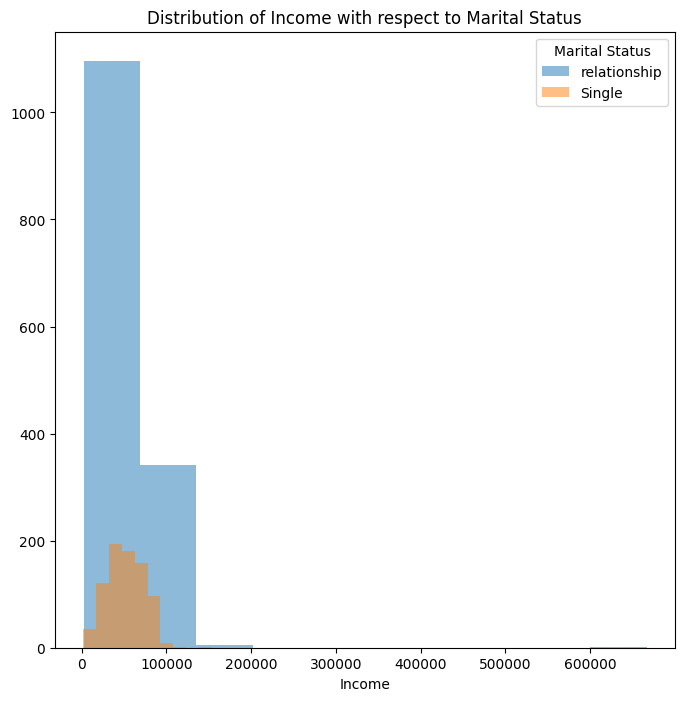

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("Income", data = df[df["Marital_Status"] == "relationship"], alpha = 0.5, label = "relationship")
plt.hist("Income", data = df[df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Income with respect to Marital Status")
plt.xlabel("Income")
plt.legend(title = "Marital Status")
plt.show()

#ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO MARITAL STATUS

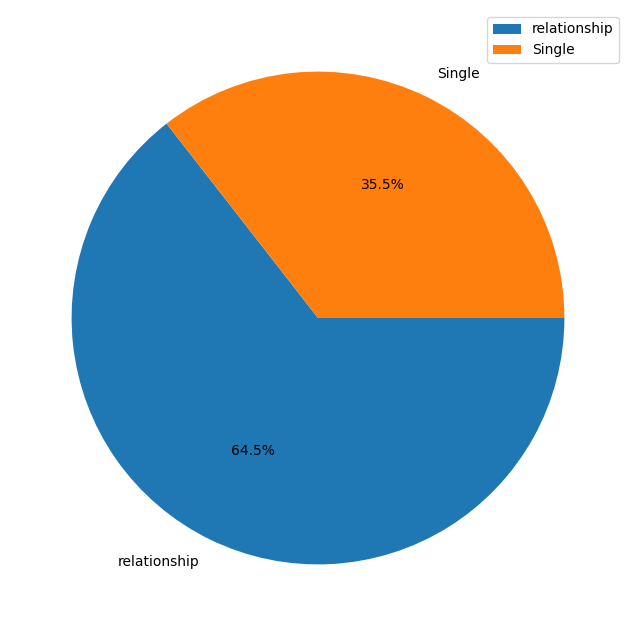

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df["Marital_Status"].value_counts(), labels = ["relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

##35% of the customer are single whereas more 64% are in relationship.

#ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO EDUCATION

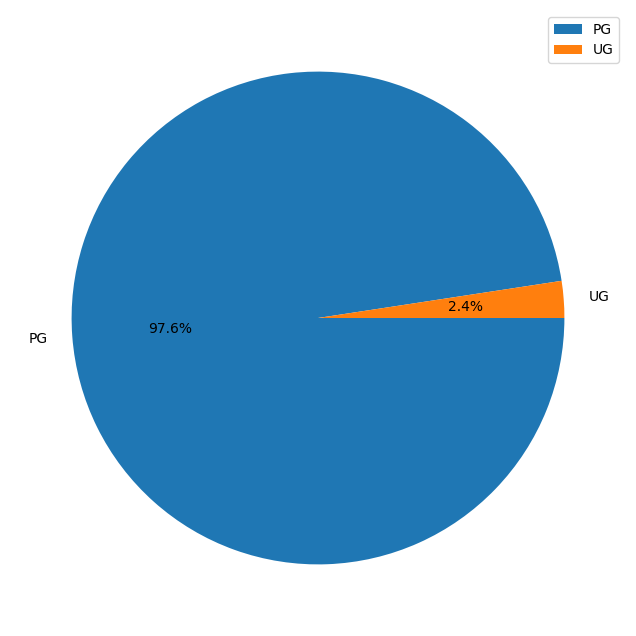

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df["Education"].value_counts(), labels = ["PG", "UG"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

##More than 97% customer are from PG background. and Approx. 2% are from UG.

#DISTRIBUTION OF EXPENSES BASED ON EDUCATION

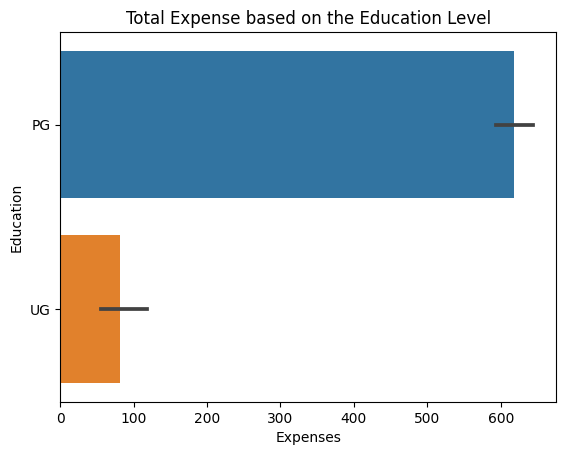

In [ ]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');
plt.show()

#INCOME BASED ON EDUCATION LEVEL

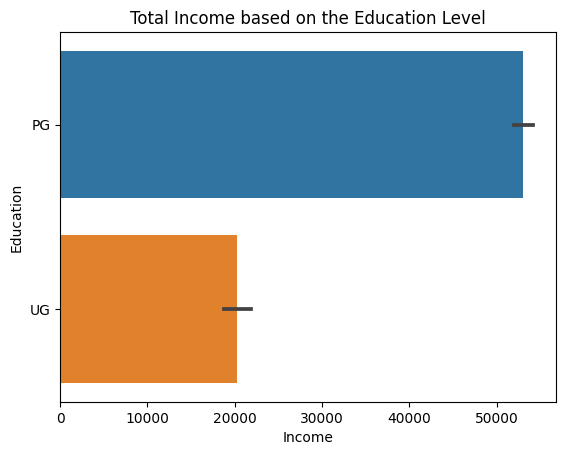

In [ ]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');
plt.show()

In [ ]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,539.582143
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,186.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,541.500000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,715.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,885.000000


##LABEL ENCODING

In [ ]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

In [ ]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [ ]:
df1 = df.copy()

In [ ]:
df1.head(3)

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0,0,58138.0,0,1617,1,25,58,849
1,0,0,46344.0,2,27,0,6,61,299
2,0,1,71613.0,0,776,0,21,50,498


#OUTLIERS DETECTION

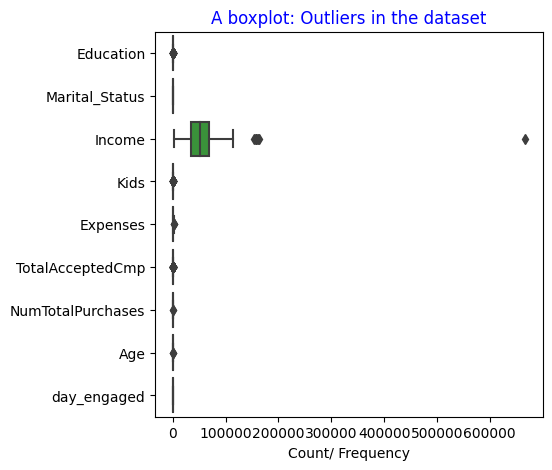

In [ ]:
# check for outliers
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df1 , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

In [ ]:
from math import sqrt
# Drop Outliers
q3 = df1.quantile(0.75)
q1 = df1.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

df1 = df1[~( (df1 < lower_range)|(df1 > upper_range) ).any(axis=1)]

#**K-MEANS CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans

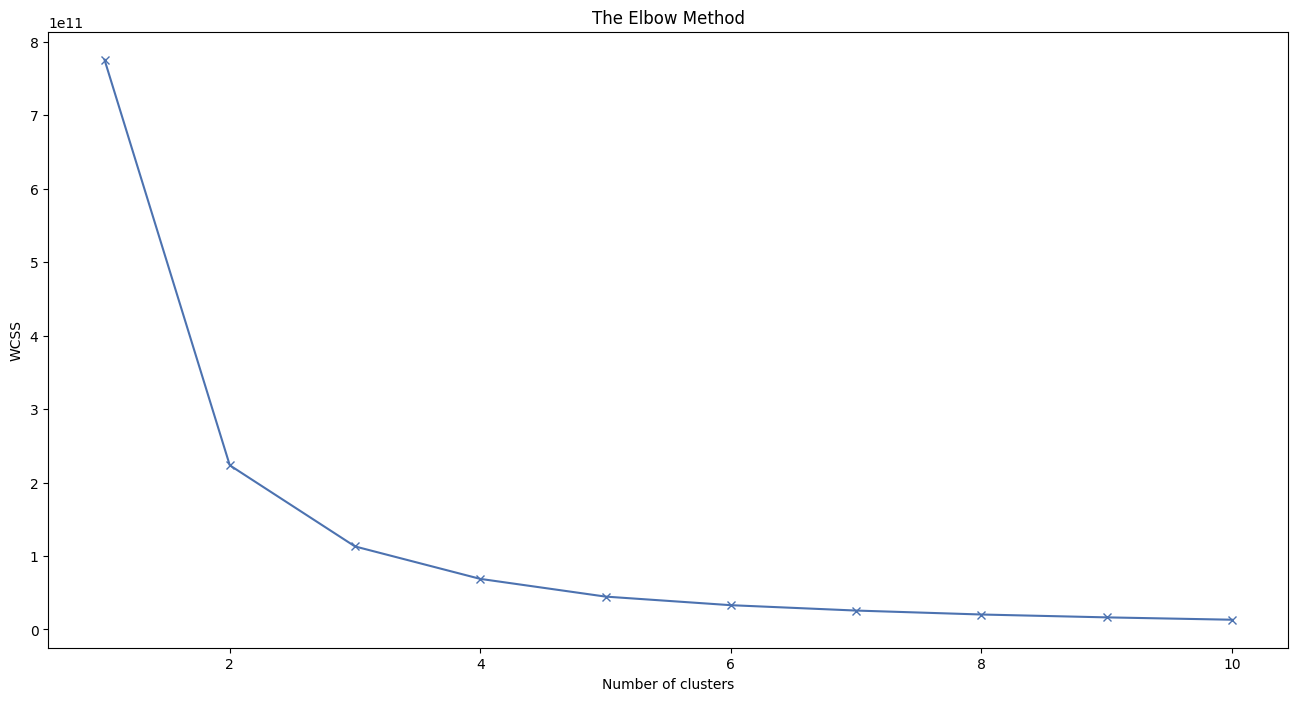

In [ ]:
wcss=[] ##Initializing the list for the values of WCSS  
for i in range (1,11): #for diferent values of k ranging from 1 to 10
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(df1)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##As it is not very clear from the elbow method that which value of K to choose.


##Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score 

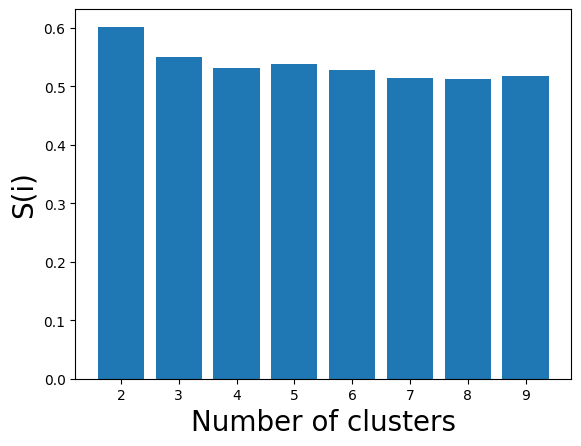

In [ ]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df1)
    silhouette_scores.append(silhouette_score(df1, m1.fit_predict(df1))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

##Here we are using Silhouette score to measure the value of K

In [ ]:
silhouette_scores

[0.6020033618313175,
 0.5507943911857252,
 0.5306902010312631,
 0.5382176145209517,
 0.528383249500582,
 0.5147554864022281,
 0.5133932844536945,
 0.5173246689234221]

In [ ]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


#Model Building


In [ ]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(df1)
pred=kmeans.predict(df1)


# Appending those cluster value into main dataframe (without standard-scalar)

df1['cluster'] = pred + 1

In [ ]:
df1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,849,1
1,0,0,46344.0,2,27,0,6,61,299,2
2,0,1,71613.0,0,776,0,21,50,498,1
3,0,1,26646.0,1,53,0,8,31,325,2
4,0,1,58293.0,1,422,0,19,34,347,1


##Clustering

In [ ]:
df1['cluster'].value_counts()

1    1018
2    1004
Name: cluster, dtype: int64

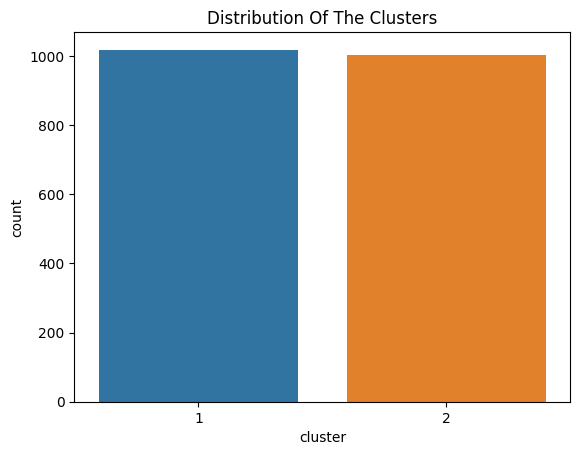

In [ ]:
pl = sns.countplot(x=df1["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

##OBSERVATIONS :-

As we can see here that weightage of customer are more in cluster 1 as compare to other.

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


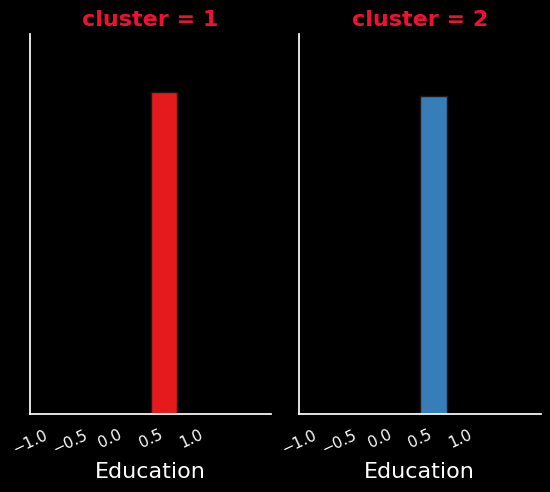

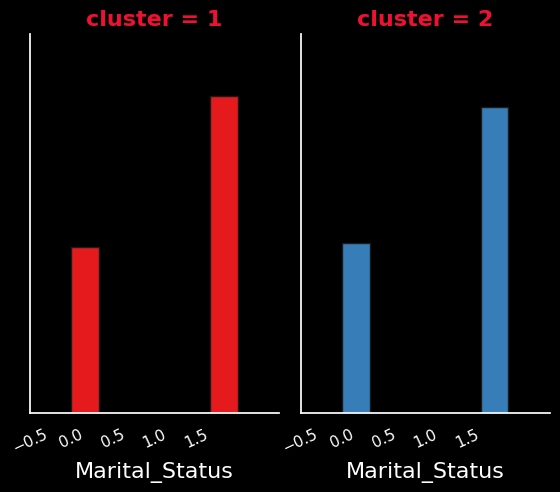

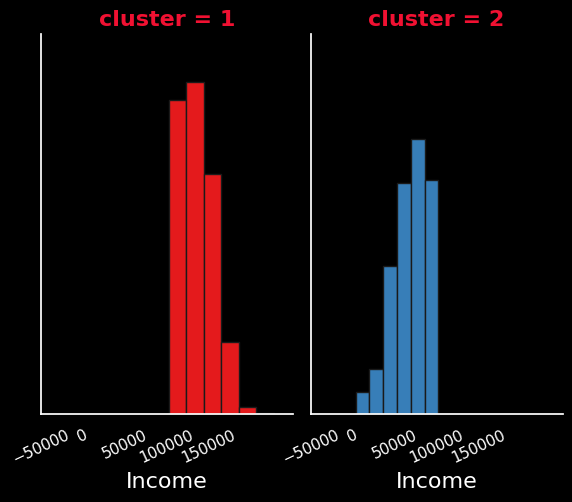

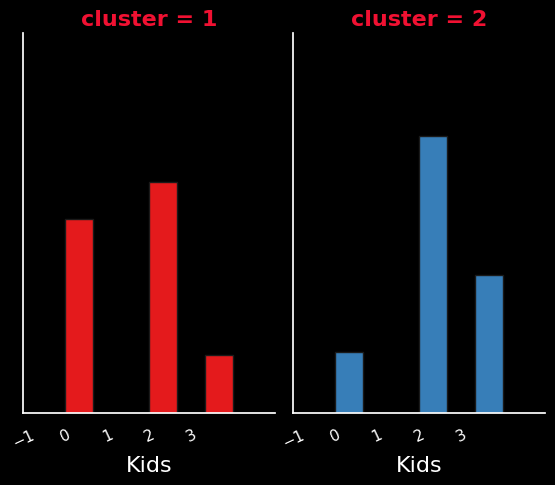

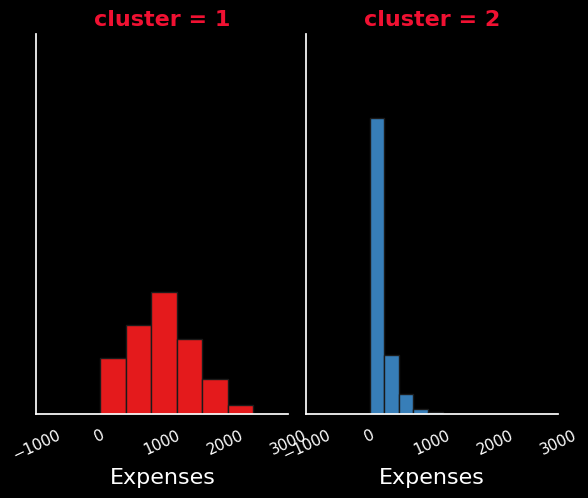

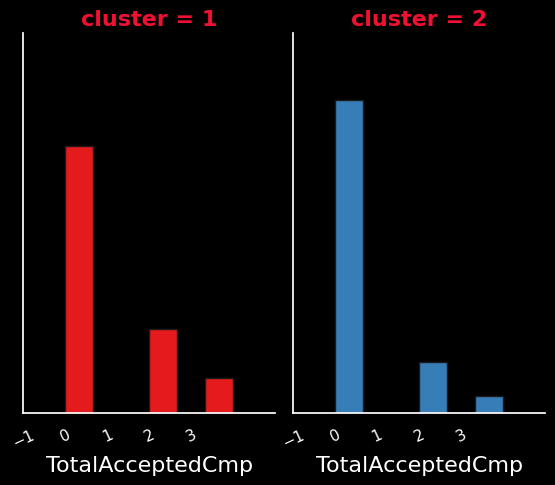

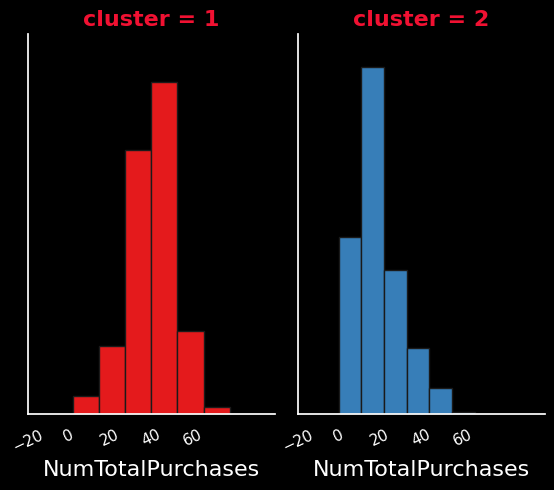

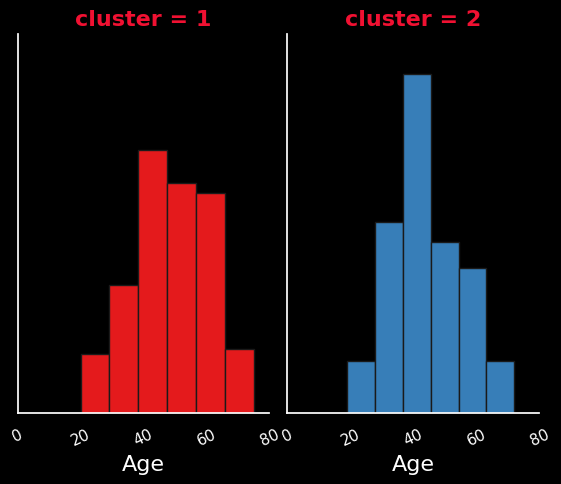

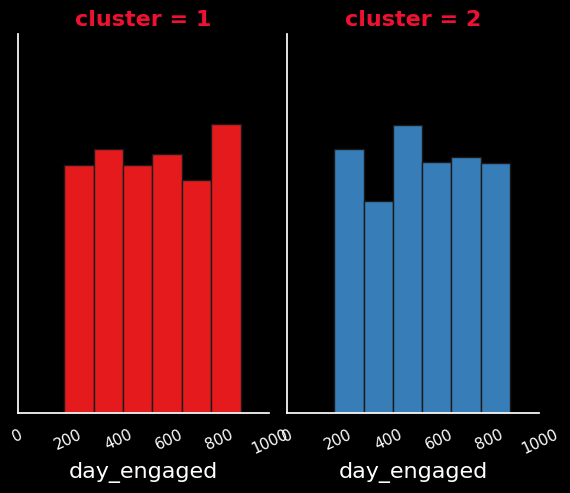

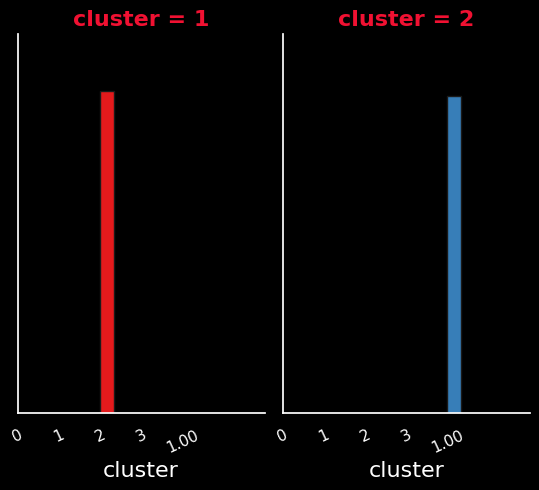

In [ ]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df1:
    diag = sns.FacetGrid(df1, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

plt.show()

##OBSERVATIONS: Based on above information we can divide customer into 2 parts:-
Highly Active Customer :- These customers belong to cluster one.

Least Active Customer :- These customers belong to cluster two.

##1.Characteristics of Highly Active Customer
##In terms of Education
Highly Active Customer are from PG background

##In terms of Marital_status
Number of people in relationship are approx. two times of single people

##In terms of Income
Income of Highly active customer are little less as compare to least active customer.

##In terms of Kids
Highly active customer have more number of children as compare to other customer ( avg. of 1 child ).

##In terms of Expenses
Expenses of Highly Active customer are less as compare to least.
These customer spent avg. of approx. 100-200 unit money.

##In terms of Age
Age of these customer are between 25 to 75.
Maximum customer age are between 40 to 50.

##In terms of day_engaged
Highly Active customer are more loyal as they engaged with company for longer period of time.


##2.Characteristics of Least Active Customer
##In terms of Education
Least Active Customer are from UG backgroud

##In terms of Marital_status
Number of people in relationship are approx. equal to single people

##In terms of Income
Income of Least active customer are very less or say negligible.

##In terms of Kids
Only few of these customer have child.

##In terms of Expenses
Expenses of Least Active customer are very less or say negligible.

##In terms of Age
Age of these customer are between 15 to 30.

##In terms of day_engaged
Least Active customer are not much enrolled with company for longer time

In [ ]:
PLOT = go.Figure()
for C in list(df1.cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df1[df1.cluster == C]['Income'],
                                y = df1[df1.cluster == C]['Age'],
                                z = df1[df1.cluster == C]['day_engaged'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Age: %{y} <br>Days Engaged: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Days Engaged', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

#MODEL EVALUATION

In [ ]:
#kmeans

from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix \n",confusion_matrix(kmeans.labels_, pred))
print("classification report \n", classification_report(kmeans.labels_, pred))

ConfusionMatrix 
 [[1018    0]
 [   0 1004]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1018
           1       1.00      1.00      1.00      1004

    accuracy                           1.00      2022
   macro avg       1.00      1.00      1.00      2022
weighted avg       1.00      1.00      1.00      2022



#**ASSOCIATION RULE MINING: APRIORI ALGORITHM**

Association Rule Mining is used when we want to find an association between different objects in a set, find frequent patterns in a transaction database. 

The Apriori algorithm is the simplest technique to identify the underlying relationships between different types of elements.

Here we use this algorithm to find out which customers are best suited for a given item. Thereby helping businesses promote the right target customers to increase efficiency and save costs.

In [ ]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2203355cee5b429cba465b57e50225cbd7114e2f97053a52a4e3249dd14d8106
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Data Preparation for Apriori Algorithm

In [ ]:
data = df1.copy()
data.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,849,1
1,0,0,46344.0,2,27,0,6,61,299,2
2,0,1,71613.0,0,776,0,21,50,498,1
3,0,1,26646.0,1,53,0,8,31,325,2
4,0,1,58293.0,1,422,0,19,34,347,1


In [ ]:
#Create Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)
#Create Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)
#Create day engaged segment
cut_labels_dayengaged = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['dayengaged_group'] = pd.qcut(data['day_engaged'], q=4, labels=cut_labels_dayengaged)
data=data.drop(columns=['Age','Income','day_engaged'])

Defining new segments according to the spending of customers on each product which will be based on:

Cluster 1 - Highly Active Customer

Cluster 2 - Least Active Customer


In [ ]:
cut_labels = ['Least Active Customer', 'Highly Active Customer']
data['Wines_segment'] = pd.qcut(Products_DF['Wines'][Products_DF['Wines']>0],q=[0, 0.5 ,1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(Products_DF['Fruits'][Products_DF['Fruits']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(Products_DF['Meat'][Products_DF['Meat']>0],q=[0, 0.5,1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(Products_DF['Fish'][Products_DF['Fish']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(Products_DF['Sweets'][Products_DF['Sweets']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(Products_DF['Gold'][Products_DF['Gold']>0],q=[0, 0.5, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Inactive Customer",inplace=True)
data = data.astype(object)

In [ ]:
data.head()

,Education,Marital_Status,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,cluster,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,0,0,0,1617,1,25,1,Mature,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,0,0,2,27,0,6,2,Mature,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,0,1,0,776,0,21,1,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,0,1,1,53,0,8,2,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,0,1,1,422,0,19,1,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


#Applying Apriori Algorithm

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

In [ ]:
association = data.copy() 
association.head()

,Education,Marital_Status,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,cluster,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,0,0,0,1617,1,25,1,Mature,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,0,0,2,27,0,6,2,Mature,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,0,1,0,776,0,21,1,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,0,1,1,53,0,8,2,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,0,1,1,422,0,19,1,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


In [ ]:
association.drop(["Education", "Marital_Status", "Kids", "Expenses", "TotalAcceptedCmp", "NumTotalPurchases", "cluster"], axis = 1, inplace = True)
association.head()

,Age_group,Income_group,dayengaged_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,Mature,Medium to high income,Old customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
1,Mature,Low to medium income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
2,Mature,High income,Discovering customers,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer
3,Adult,Low income,New customers,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer,Least Active Customer
4,Adult,Medium to high income,New customers,Least Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Highly Active Customer,Least Active Customer


#Setting the Association Rules

In [ ]:
df_ap = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df_ap, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

#Finding the "Highly Active Customers" when it comes to "Wine"

In [ ]:
product='Wines'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5876,"(Fruits_segment_Highly Active Customer, Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income)",(Wines_segment_Highly Active Customer),0.102,0.497,0.101,0.986,1.983,0.050,34.705
8749,"(Age_group_Mature, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income, Fruits_segment_Highly Active Customer)",(Wines_segment_Highly Active Customer),0.093,0.497,0.092,0.984,1.980,0.046,31.687
8811,"(Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)",(Wines_segment_Highly Active Customer),0.090,0.497,0.088,0.983,1.979,0.044,30.346
6025,"(Gold_segment_Highly Active Customer, Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income)",(Wines_segment_Highly Active Customer),0.085,0.497,0.084,0.983,1.977,0.041,28.837
10426,"(Age_group_Mature, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)",(Wines_segment_Highly Active Customer),0.083,0.497,0.082,0.982,1.976,0.040,28.166


#Finding the "Highly Active Customers" when it comes to "Fruits"

In [ ]:
product='Fruits'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6142,"(Gold_segment_Highly Active Customer, Age_group_Mature, Meat_segment_Highly Active Customer, Income_group_High income)",(Fruits_segment_Highly Active Customer),0.085,0.394,0.080,0.942,2.393,0.047,10.429
10421,"(Wines_segment_Highly Active Customer, Age_group_Mature, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.087,0.394,0.082,0.938,2.381,0.047,9.701
9488,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income)",(Fruits_segment_Highly Active Customer),0.169,0.394,0.158,0.936,2.377,0.092,9.426
10673,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.153,0.394,0.143,0.935,2.376,0.083,9.398
9551,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fruits_segment_Highly Active Customer),0.161,0.394,0.150,0.935,2.376,0.087,9.384


#Finding the "Highly Active Customers" when it comes to "Meat"

In [ ]:
product='Meat'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10676,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)",(Meat_segment_Highly Active Customer),0.143,0.496,0.143,1.000,2.016,0.072,inf
5874,"(Fruits_segment_Highly Active Customer, Age_group_Mature, Wines_segment_Highly Active Customer, Income_group_High income)",(Meat_segment_Highly Active Customer),0.101,0.496,0.101,1.000,2.016,0.051,inf
6715,"(Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Meat_segment_Highly Active Customer),0.184,0.496,0.184,1.000,2.016,0.093,inf
6744,"(Gold_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income)",(Meat_segment_Highly Active Customer),0.167,0.496,0.167,1.000,2.016,0.084,inf
8314,"(Age_group_Adult, Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)",(Meat_segment_Highly Active Customer),0.080,0.496,0.080,1.000,2.016,0.040,inf


#Finding the "Highly Active Customers" when it comes to "Fish"

In [ ]:
product='Fish'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6954,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.161,0.404,0.154,0.954,2.361,0.089,12.952
10675,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.150,0.404,0.143,0.954,2.361,0.083,12.941
9615,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.150,0.404,0.143,0.954,2.361,0.083,12.941
9676,"(Gold_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.161,0.404,0.153,0.954,2.361,0.088,12.912
3250,"(Gold_segment_Highly Active Customer, Income_group_High income, Sweets_segment_Highly Active Customer)",(Fish_segment_Highly Active Customer),0.169,0.404,0.160,0.947,2.344,0.092,11.290


#Finding the "Highly Active Customers" when it comes to "Sweets"

In [ ]:
product='Sweets'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3248,"(Gold_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income)",(Sweets_segment_Highly Active Customer),0.176,0.389,0.160,0.910,2.338,0.091,6.776
7072,"(Gold_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Income_group_High income)",(Sweets_segment_Highly Active Customer),0.164,0.389,0.149,0.909,2.336,0.085,6.739
7102,"(Gold_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Income_group_High income)",(Sweets_segment_Highly Active Customer),0.174,0.389,0.158,0.909,2.336,0.091,6.719
9736,"(Gold_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Income_group_High income, Fruits_segment_Highly Active Customer)",(Sweets_segment_Highly Active Customer),0.163,0.389,0.148,0.909,2.335,0.085,6.698
6952,"(Gold_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Income_group_High income)",(Sweets_segment_Highly Active Customer),0.170,0.389,0.154,0.907,2.330,0.088,6.547


#Finding the "Highly Active Customers" when it comes to "Gold"

In [ ]:
product='Gold'
segment='Highly Active Customer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnel_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnel_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10175,"(Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)",(Gold_segment_Highly Active Customer),0.233,0.473,0.198,0.850,1.797,0.088,3.505
7676,"(Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Sweets_segment_Highly Active Customer)",(Gold_segment_Highly Active Customer),0.235,0.473,0.199,0.848,1.794,0.088,3.478
8316,"(Age_group_Adult, Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer, Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer)",(Gold_segment_Highly Active Customer),0.094,0.473,0.080,0.848,1.794,0.035,3.472
5173,"(Age_group_Adult, Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer)",(Gold_segment_Highly Active Customer),0.095,0.473,0.080,0.844,1.785,0.035,3.374
7616,"(Fish_segment_Highly Active Customer, Fruits_segment_Highly Active Customer, Wines_segment_Highly Active Customer, Meat_segment_Highly Active Customer)",(Gold_segment_Highly Active Customer),0.271,0.473,0.228,0.843,1.783,0.100,3.359


#Objective of Association Rule Mining

In this way, if we can find the Biggest Consumers for a particular product, multiple ways of market these products can be narrowed down to these customers and their needs. 

Thus, Apriori Algorithm will help the businesses to plan appropriate Product Pricings, making better decisions on Product Positioning and helping the business owner to work on product assortment and availability of different category of products, all based on the needs of these Highly Active Customers.

#**CLASSIFICATION: LOGISTIC REGRESSION**
To determine whether customers will purchase the company’s product or not?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df2=df1.copy()
x = df2.drop('cluster', axis=1)
y = df2['cluster']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
log_reg = LogisticRegression()                   # object

log_reg.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_predicted = log_reg.predict(x_test)

#MODEL EVALUATION

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

Classification Report: 
               precision    recall  f1-score   support

           1       0.90      0.93      0.91       200
           2       0.92      0.90      0.91       205

    accuracy                           0.91       405
   macro avg       0.91      0.91      0.91       405
weighted avg       0.91      0.91      0.91       405

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9111111111111111
----------------------------------------------------------------------------------------------------

F1 Score:  0.9113300492610837
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


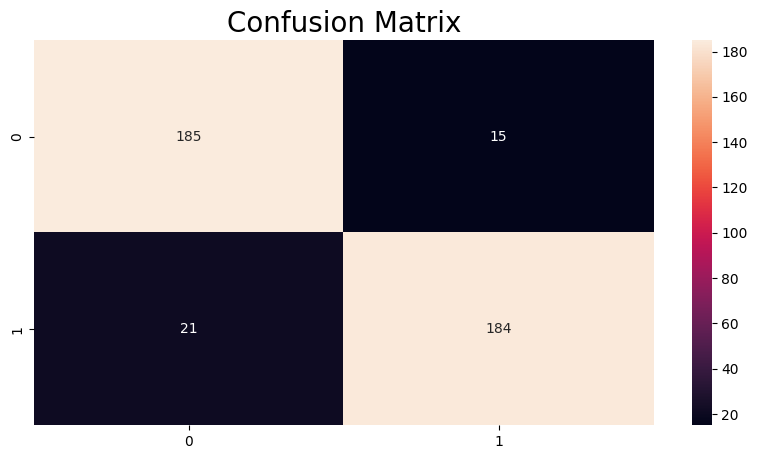

In [ ]:
#performance of model
print("Classification Report: \n", classification_report(y_test,y_predicted))
print("-" * 100)
print()
    
acc = accuracy_score(y_test, y_predicted)

print("Accuracy Score: ", acc)
print("-" * 100)
print()

f1 = f1_score(y_test, y_predicted)

print("F1 Score: ", f1)
print("-" * 100)
print()
    
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
plt.show()




Observation: From, the above confusion matrix, it can be seen that Logistic Regression predicted only 36 incorrect values but rest all values were predicted correctly that means that the Logistic Regression classifier did perform reasonably well.
